<a href="https://colab.research.google.com/github/VISHAL-KURRE/data-science/blob/main/RandomSearchCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
#AX_set, X, AY_set, Y = train_test_split(x,y,stratify=y, test_size=0.66,random_state=42)
#BX_set,  CX_set, BY_set, CY_set = train_test_split(X,Y,stratify=Y, test_size=0.5,random_state=42)

X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)


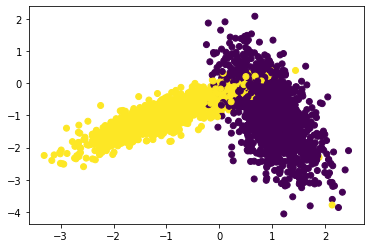

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [ ]:
def don2 (count, x_train):
  data_length= len(x_train)
  data_split_length= int(data_length/folds)

  val=0
  pval=0
  max_val={}
  min_val={}
  # for every i value in a fold
  for i in range(folds):
      val=val + data_split_length
      max_val[i] = val
      min_val[i] = pval
      pval=val
  count=0
  test=[]
  train=[]
  test.clear()
  train.clear()
  for fre, fold in max_val.items():
      if(count==fre):
          # returns all index values of test for every fold
          for index in range(min_val[fre],max_val[fre]):
              test.append(index)
      else:

          # returns all index values of rtain for every fold
          for index in range(min_val[fre],max_val[fre]):
               train.append(index)
  return test,train
     

In [ ]:
# it will take classifier and set of values for hyper prameter in dict type dict({hyper parmeter: [list of values]})
# we are implementing this only for KNN, the hyper parameter should n_neighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

def RandomSearchCV(x_train,y_train,classifier, params, folds):
    trainscores = []
    testscores  = [] 
    
    for k in tqdm(params['n_neighbors']):    
        trainscores_folds = []
        testscores_folds  = []
        count=0


        # for every count in folds
        for count in range(folds):
            test, train = don2(count,x_train)

            #print("%s %s" % (train, test))
            count= count+1

            # selecting the data points based on the train indices and test indices
            X_train = x_train[train]
            Y_train = y_train[train]
            X_test  = x_train[test]
            Y_test  = y_train[test]

            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)

            # predict test
            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))

            # predict train
            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))

        # insert mean values of train scores for fold 
        trainscores.append(np.mean(np.array(trainscores_folds)))   

        # insert mean values of test scores for fold      
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")
def generate_param_values(value_len, min_value, max_value):
    # it generates random unique values using uniform distribution

    if (max_value - min_value) >= value_len: 
        
        random_set = set()
        while len(random_set) < value_len:
            random_set.add(int(np.random.uniform(min_value,max_value)))
            
        return sorted(list(random_set))

neigh = KNeighborsClassifier()
param_range =  tuple(map(int,input("enter a,b values :  \n").split(',')))
print() if len(param_range)==2 else print("invalid input param range ")

params = {'n_neighbors': generate_param_values(10, param_range[0], param_range[1]) }
print("10 random numbers in range {} to {} ".format(param_range[0],param_range[1]))
print(params)
folds = int(input("Enter number of folds :  \n"))
#print(folds)
#param_range=(1,50)
#params = {'n_neighbors': generate_param_values(10, param_range[0], param_range[1]) }
#folds=3


enter a,b values :  
1,50

10 random numbers in range 1 to 50 
{'n_neighbors': [5, 6, 7, 19, 31, 32, 37, 42, 48, 49]}
Enter number of folds :  
3


In [ ]:
trainscores,testscores = RandomSearchCV(X_train, y_train, neigh, params, folds)
 

100%|██████████| 10/10 [00:09<00:00,  1.10it/s]


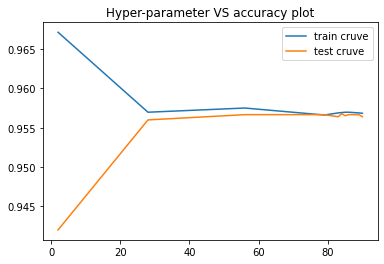

In [ ]:
plt.plot(params['n_neighbors'],trainscores, label='train cruve')
plt.plot(params['n_neighbors'],testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()
print("\n \n \n")

In [ ]:

# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

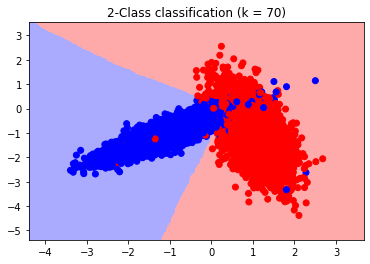

In [ ]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 70)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)
